In [7]:
import numpy as np
import os
from astropy.coordinates import SkyCoord
import astropy.units as u


In [36]:
SAVE_BASE_PATH = "../Lab4Data/4_29_CalInt_4"
NSAMPLES = 2048
NBLOCKS = 17200
CAL_INTERVAL = 4

def galactic_to_equatorial(l, b):
    c = SkyCoord(l=l*u.deg, b=b*u.deg, frame='galactic')
    return c.icrs.ra.deg, c.icrs.dec.deg

def generate_expected_points():
    points = []
    for b in np.arange(15, 52, 2):
        delta_l = 2 / np.cos(np.radians(b))
        for l in np.arange(105, 162, delta_l):
            points.append((round(l, 5), round(b, 5)))
    return points

def get_saved_points():
    saved_points = set()
    for pol_folder in os.listdir(SAVE_BASE_PATH):
        folder_path = os.path.join(SAVE_BASE_PATH, pol_folder)
        if not os.path.isdir(folder_path):
            continue
        for fname in os.listdir(folder_path):
            if fname.endswith(".npz"):
                try:
                    fpath = os.path.join(folder_path, fname)
                    data = np.load(fpath)
                    l = round(float(data['gal_l']), 5)
                    b = round(float(data['gal_b']), 5)
                    saved_points.add((l, b))
                except Exception as e:
                    print(f"Error reading {fname}: {e}")
    return saved_points

if __name__ == "__main__":
    expected_points = set(generate_expected_points())
    saved_points = get_saved_points()

    missing_points = expected_points - saved_points

    print(f"Total expected points: {len(expected_points)}")
    print(f"Total points saved: {len(saved_points)}")
    print(f"Missing points ({len(missing_points)} total):")
    for l, b in sorted(missing_points):
        print(f"l = {l:.5f}, b = {b:.5f}")

Total expected points: 454
Total points saved: 307
Missing points (147 total):
l = 105.00000, b = 15.00000
l = 105.00000, b = 17.00000
l = 105.00000, b = 19.00000
l = 105.00000, b = 21.00000
l = 105.00000, b = 23.00000
l = 105.00000, b = 49.00000
l = 105.00000, b = 51.00000
l = 107.07055, b = 15.00000
l = 107.09138, b = 17.00000
l = 107.11524, b = 19.00000
l = 107.14229, b = 21.00000
l = 107.17272, b = 23.00000
l = 108.04851, b = 49.00000
l = 108.17803, b = 51.00000
l = 109.14110, b = 15.00000
l = 109.18277, b = 17.00000
l = 109.23048, b = 19.00000
l = 109.28458, b = 21.00000
l = 109.34544, b = 23.00000
l = 111.09701, b = 49.00000
l = 111.21166, b = 15.00000
l = 111.27415, b = 17.00000
l = 111.34572, b = 19.00000
l = 111.35606, b = 51.00000
l = 111.42687, b = 21.00000
l = 111.51816, b = 23.00000
l = 111.62027, b = 25.00000
l = 113.28221, b = 15.00000
l = 113.36553, b = 17.00000
l = 113.46097, b = 19.00000
l = 113.56916, b = 21.00000
l = 113.69088, b = 23.00000
l = 113.82702, b = 25.000

In [35]:
missing_points

{(105.0, 15),
 (105.0, 17),
 (105.0, 19),
 (105.0, 21),
 (105.0, 23),
 (105.0, 49),
 (105.0, 51),
 (107.07055, 15),
 (107.09138, 17),
 (107.11524, 19),
 (107.14229, 21),
 (107.17272, 23),
 (108.04851, 49),
 (108.17803, 51),
 (109.1411, 15),
 (109.18277, 17),
 (109.23048, 19),
 (109.28458, 21),
 (109.34544, 23),
 (111.09701, 49),
 (111.21166, 15),
 (111.27415, 17),
 (111.34572, 19),
 (111.35606, 51),
 (111.42687, 21),
 (111.51816, 23),
 (111.62027, 25),
 (113.28221, 15),
 (113.36553, 17),
 (113.46097, 19),
 (113.56916, 21),
 (113.69088, 23),
 (113.82702, 25),
 (114.14552, 49),
 (114.53409, 51),
 (115.35276, 15),
 (115.45692, 17),
 (115.57621, 19),
 (115.71145, 21),
 (115.8636, 23),
 (116.03378, 25),
 (116.73023, 47),
 (117.19402, 49),
 (117.42331, 15),
 (117.5483, 17),
 (117.69145, 19),
 (117.71213, 51),
 (117.85374, 21),
 (118.03632, 23),
 (118.24054, 25),
 (119.49387, 15),
 (119.63968, 17),
 (119.66279, 47),
 (119.80669, 19),
 (119.99603, 21),
 (120.20905, 23),
 (120.24253, 49),
 (120

In [37]:
generate_expected_points()

[(105.0, 15),
 (107.07055, 15),
 (109.1411, 15),
 (111.21166, 15),
 (113.28221, 15),
 (115.35276, 15),
 (117.42331, 15),
 (119.49387, 15),
 (121.56442, 15),
 (123.63497, 15),
 (125.70552, 15),
 (127.77608, 15),
 (129.84663, 15),
 (131.91718, 15),
 (133.98773, 15),
 (136.05829, 15),
 (138.12884, 15),
 (140.19939, 15),
 (142.26994, 15),
 (144.34049, 15),
 (146.41105, 15),
 (148.4816, 15),
 (150.55215, 15),
 (152.6227, 15),
 (154.69326, 15),
 (156.76381, 15),
 (158.83436, 15),
 (160.90491, 15),
 (105.0, 17),
 (107.09138, 17),
 (109.18277, 17),
 (111.27415, 17),
 (113.36553, 17),
 (115.45692, 17),
 (117.5483, 17),
 (119.63968, 17),
 (121.73107, 17),
 (123.82245, 17),
 (125.91384, 17),
 (128.00522, 17),
 (130.0966, 17),
 (132.18799, 17),
 (134.27937, 17),
 (136.37075, 17),
 (138.46214, 17),
 (140.55352, 17),
 (142.6449, 17),
 (144.73629, 17),
 (146.82767, 17),
 (148.91905, 17),
 (151.01044, 17),
 (153.10182, 17),
 (155.1932, 17),
 (157.28459, 17),
 (159.37597, 17),
 (161.46735, 17),
 (105.0

In [38]:
def get_saved_points():
    saved_points = set()
    for pol_folder in os.listdir(SAVE_BASE_PATH):
        folder_path = os.path.join(SAVE_BASE_PATH, pol_folder)
        if not os.path.isdir(folder_path):
            continue
        for fname in os.listdir(folder_path):
            if fname.endswith(".npz"):
                try:
                    fpath = os.path.join(folder_path, fname)
                    data = np.load(fpath)
                    l = round(float(data['gal_l']), 5)
                    b = round(float(data['gal_b']), 5)
                    saved_points.add((l, b))
                except Exception as e:
                    print(f"Error reading {fname}: {e}")
    return saved_points

saved_points = get_saved_points()
print(f"Total saved points: {len(saved_points)}")
for l, b in sorted(saved_points):
    print(f"l = {l:.5f}, b = {b:.5f}")


Total saved points: 307
l = 105.00000, b = 25.00000
l = 105.00000, b = 27.00000
l = 105.00000, b = 29.00000
l = 105.00000, b = 31.00000
l = 105.00000, b = 33.00000
l = 105.00000, b = 35.00000
l = 105.00000, b = 37.00000
l = 105.00000, b = 39.00000
l = 105.00000, b = 41.00000
l = 105.00000, b = 43.00000
l = 105.00000, b = 45.00000
l = 105.00000, b = 47.00000
l = 107.20676, b = 25.00000
l = 107.24465, b = 27.00000
l = 107.28671, b = 29.00000
l = 107.33327, b = 31.00000
l = 107.38473, b = 33.00000
l = 107.44155, b = 35.00000
l = 107.50427, b = 37.00000
l = 107.57352, b = 39.00000
l = 107.65003, b = 41.00000
l = 107.73465, b = 43.00000
l = 107.82843, b = 45.00000
l = 107.93256, b = 47.00000
l = 109.41351, b = 25.00000
l = 109.48930, b = 27.00000
l = 109.57342, b = 29.00000
l = 109.66653, b = 31.00000
l = 109.76945, b = 33.00000
l = 109.88310, b = 35.00000
l = 110.00854, b = 37.00000
l = 110.14704, b = 39.00000
l = 110.30005, b = 41.00000
l = 110.46931, b = 43.00000
l = 110.65685, b = 45.00

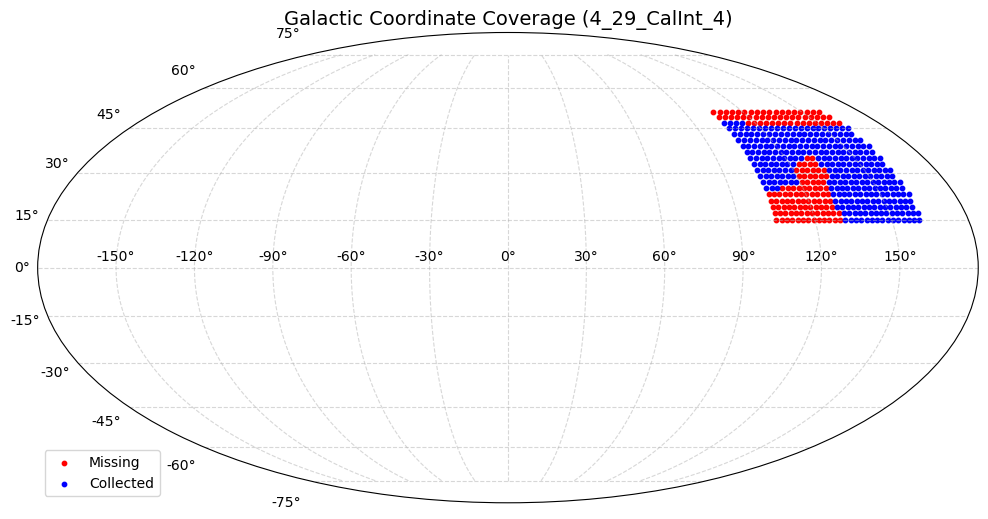

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from astropy.coordinates import SkyCoord
import astropy.units as u

SAVE_BASE_PATH = "../Lab4Data/4_29_CalInt_4"

def generate_expected_points():
    points = []
    for b in np.arange(15, 52, 2):
        delta_l = 2 / np.cos(np.radians(b))
        for l in np.arange(105, 162, delta_l):
            points.append((round(l, 5), round(b, 5)))
    return points

def get_saved_points():
    saved_points = set()
    for pol_folder in os.listdir(SAVE_BASE_PATH):
        folder_path = os.path.join(SAVE_BASE_PATH, pol_folder)
        if not os.path.isdir(folder_path):
            continue
        for fname in os.listdir(folder_path):
            if fname.endswith(".npz"):
                try:
                    fpath = os.path.join(folder_path, fname)
                    data = np.load(fpath)
                    l = round(float(data['gal_l']), 5)
                    b = round(float(data['gal_b']), 5)
                    saved_points.add((l, b))
                except Exception as e:
                    print(f"Error reading {fname}: {e}")
    return saved_points

def convert_to_radians(point_set):
    l_vals = np.radians([l for l, b in point_set])  
    b_vals = np.radians([b for l, b in point_set])
    return l_vals, b_vals

expected_points = set(generate_expected_points())
saved_points = get_saved_points()
missing_points = expected_points - saved_points

l_saved, b_saved = convert_to_radians(saved_points)
l_missing, b_missing = convert_to_radians(missing_points)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='mollweide')
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title("Galactic Coordinate Coverage (4_29_CalInt_4)", fontsize=14)

ax.scatter(l_missing, b_missing, s=10, color='red', label='Missing')
ax.scatter(l_saved, b_saved, s=10, color='blue', label='Collected')

ax.legend(loc='lower left')
plt.tight_layout()
plt.show()


In [16]:
saved_points

{(105.0, 25.0),
 (105.0, 27.0),
 (105.0, 29.0),
 (105.0, 31.0),
 (105.0, 33.0),
 (105.0, 35.0),
 (105.0, 37.0),
 (105.0, 39.0),
 (105.0, 41.0),
 (105.0, 43.0),
 (105.0, 45.0),
 (105.0, 47.0),
 (107.20676, 25.0),
 (107.24465, 27.0),
 (107.28671, 29.0),
 (107.33327, 31.0),
 (107.38473, 33.0),
 (107.44155, 35.0),
 (107.50427, 37.0),
 (107.57352, 39.0),
 (107.65003, 41.0),
 (107.73465, 43.0),
 (107.82843, 45.0),
 (107.93256, 47.0),
 (109.41351, 25.0),
 (109.4893, 27.0),
 (109.57342, 29.0),
 (109.66653, 31.0),
 (109.76945, 33.0),
 (109.8831, 35.0),
 (110.00854, 37.0),
 (110.14704, 39.0),
 (110.30005, 41.0),
 (110.46931, 43.0),
 (110.65685, 45.0),
 (110.86512, 47.0),
 (111.73396, 27.0),
 (111.86012, 29.0),
 (111.9998, 31.0),
 (112.15418, 33.0),
 (112.32465, 35.0),
 (112.51281, 37.0),
 (112.72056, 39.0),
 (112.95008, 41.0),
 (113.20396, 43.0),
 (113.48528, 45.0),
 (113.79768, 47.0),
 (113.97861, 27.0),
 (114.14683, 29.0),
 (114.33307, 31.0),
 (114.53891, 33.0),
 (114.7662, 35.0),
 (115.01709,

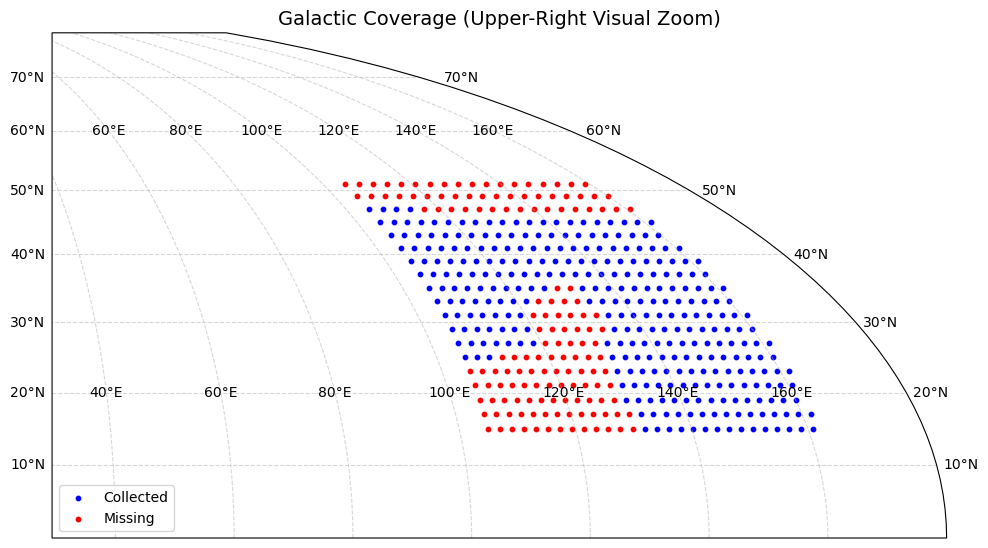

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Convert saved and missing points to arrays in degrees
l_saved = [l for l, b in saved_points]
b_saved = [b for l, b in saved_points]
l_missing = [l for l, b in missing_points]
b_missing = [b for l, b in missing_points]

# Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_title("Galactic Coverage (Upper-Right Visual Zoom)", fontsize=14)
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)

# Plot directly in degrees with PlateCarree transform
ax.scatter(l_saved, b_saved, s=10, color='blue', label='Collected', transform=ccrs.PlateCarree())
ax.scatter(l_missing, b_missing, s=10, color='red', label='Missing', transform=ccrs.PlateCarree())

# Zoom to visual upper-right quadrant (l, b from 0° to 90°)
ax.set_extent([90, 180, 0, 80], crs=ccrs.PlateCarree())

ax.legend(loc='lower left')
plt.tight_layout()
plt.show()


In [2]:
pip install cartopy

  Obtaining dependency information for cartopy from https://files.pythonhosted.org/packages/63/99/681a7ae5e572343e15ce8697dd4b41f49d45fe89f5e5d8b122bff0f8165c/Cartopy-0.24.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached Cartopy-0.24.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (7.9 kB)
  Obtaining dependency information for shapely>=1.8 from https://files.pythonhosted.org/packages/78/da/ea2a898e93c6953c5eef353a0e1781a0013a1352f2b90aa9ab0b800e0c75/shapely-2.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached shapely-2.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.8 kB)
  Obtaining dependency information for pyshp>=2.3 from https://files.pythonhosted.org/packages/98/2f/68116db5b36b895c0450e3072b8cb6c2fac0359279b182ea97014d3c8ac0/pyshp-2.3.1-py2.py3-none-any.whl.metadata
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
  Using cached pyproj-3.7.1.tar.gz (226 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... err